In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import trim_mean

In [ ]:
! pwd

/content


In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
# Code to read csv file into Colaboratory: 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
# Authenticate and create the PyDrive client. 
auth.authenticate_user()
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1zmCZvybMby-CETExsRU42xBBk1b_6gIi/view?usp=sharing'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

sharing


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('Womens _Clothing _Reviews.csv') 
#path = "https://drive.google.com/file/d/1Ke2_5NKUCd92QnJxZTdsrfEwe_-AEm_t/view?usp=sharing" 
#import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Womens _Clothing _Reviews.csv') 
#df.head() 
#df = pd.read_csv('https://drive.google.com/file/d/1Ke2_5NKUCd92QnJxZTdsrfEwe_-AEm_t/view?usp=sharing/Womens _Clothing _Reviews.csv')
#df = pd.read_csv('C:/Users/attree92/Downloads/Womens _Clothing _Reviews.csv', header=0,index_col=0)
#df.head()

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'https://drive.google.com/file/d/1zmCZvybMby-CETExsRU42xBBk1b_6gIi/view?usp=sharing'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
# Inspect the file we downloaded to /tmp
!cat /tmp/downloaded_from_womenclothingreviews

cat: /tmp/downloaded_from_womenclothingreviews: No such file or directory


In [ ]:
path ='/content/womenclothingreviews.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.shape

(23486, 11)

In [ ]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
import re
import string
from wordcloud import WordCloud
import nltk
nltk.download('all')
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [ ]:
df['Review Text'][4]

'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'

In [ ]:
review = df[['Review Text', 'Recommended IND']]
review.head()
#data prepration

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
review.isnull().sum()

Review         845
Recommended      0
dtype: int64

In [ ]:
review.dropna(subset=['Review'], inplace=True)


In [ ]:
review.isnull().sum()


Review         0
Recommended    0
dtype: int64

In [ ]:
review['Review'] = review['Review'].astype(str)


In [ ]:
review.shape


(22641, 2)

In [ ]:
review['Recommended'].value_counts()


1    18540
0     4101
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

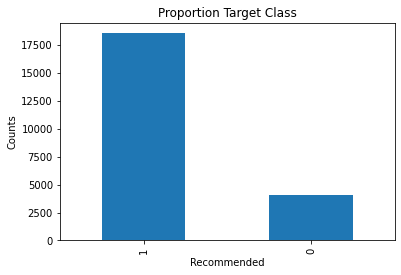

In [ ]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [ ]:
#text mining
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [ ]:
review['Review_clear'] = review['Review'].apply(tokens)
review.head()


,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


In [ ]:
review['Review_clear'] = review['Review_clear'].astype(str)


In [ ]:
#  stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [ ]:
#  stop words
stop_words = stopwords.words('english')
print(stop_words[::20])

['i', 'himself', 'that', 'a', 'through', 'here', 'own', 're', 'ma']


In [ ]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [ ]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [ ]:
review['Review_clear'] = review['Review_clear'].apply(stopwords)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [ ]:
review['Review_clear'][267]
#removing numbers


'love look quality amp say fits true size way short amp amp tall wish came tall sizes'

In [ ]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [ ]:
review['Review_clear'] = review['Review_clear'].apply(numbers)
review.head()


,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [ ]:
review['Review_clear'][1]


'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite'

In [ ]:
review['Review_clear'][20]


'product petite would get petite regular little long tailor simple fix fits nicely lb pregnant bough medium grow tie front back provides nice flexibility form fitting'

In [ ]:
positive = review[review.Recommended== 1]
negative = review[review.Recommended== 0]
positive.head()
#wordcloud

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...
6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [ ]:
negative.head()


,Review,Recommended,Review_clear
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
5,"I love tracy reese dresses, but this one is no...",0,love tracy reese dresses one petite feet tall ...
10,Dress runs small esp where the zipper area run...,0,runs small esp zipper area runs ordered sp typ...
22,"First of all, this is not pullover styling. th...",0,first pullover styling side zipper purchased k...
25,"Loved the material, but i didnt really look at...",0,loved didnt really look long purchased large m...


In [ ]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [ ]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:79]

'absolutely wonderful silky sexy comfortable love sooo pretty happened find stor'

In [ ]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hopes really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c love tracy reese dresses one petite feet tall usually p brand pretty package lot long full overwhelmed small frame stranger alterations shortening narrowing woul'

In [ ]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:999]

'high hopes really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c love tracy reese dresses one petite feet tall usually p brand pretty package lot long full overwhelmed small frame stranger alterations shortening narrowing would take away embellishment garment love idea style work returned runs small esp zipper area runs ordered sp typically fits tight looks feels cheap pulling cause rip pretty disappointed going christmas year needless say going back first pullover styling side zipper purchased knew side zipper large bust side zippers next impossible second tulle feels looks cheap slip awkward tight shape underneath looks like described sadly returning sure find something exchange loved didnt really look long purchased large medium im atleast feet gaps front m

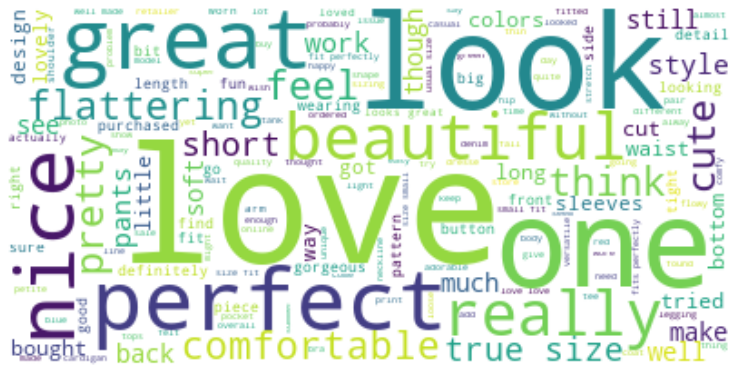

In [ ]:
#most common words
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

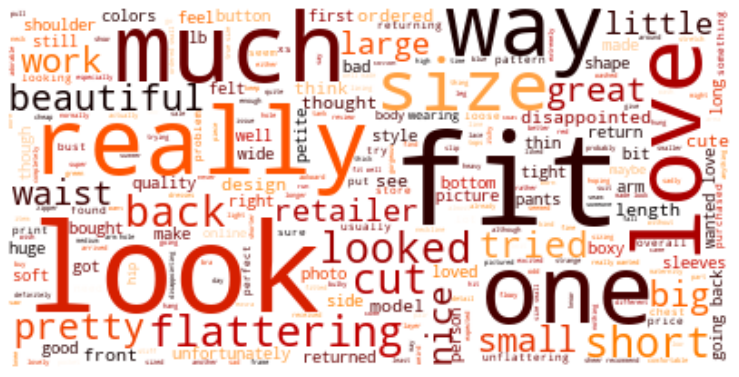

In [ ]:
#Most Common words in not Recommended Review

wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

 **Following Classification models:**
1)Logistic Regression,
2)Naive Bayes,
3)Support Vector Machine,
4)Random Forest,
5)Ada Boosting.
convert text files into numerical feature vectors
spliting the data into train and test sets

In [ ]:
#spliting the data into train and test sets:
for i in df:
  print(df)

#X = review['Review_clear']
#y = review['Recommended']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

       Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
0               0          767   33  ...       Initmates        Intimate   Intimates
1               1         1080   34  ...         General         Dresses     Dresses
2               2         1077   60  ...         General         Dresses     Dresses
3               3         1049   50  ...  General Petite         Bottoms       Pants
4               4          847   47  ...         General            Tops     Blouses
...           ...          ...  ...  ...             ...             ...         ...
23481       23481         1104   34  ...  General Petite         Dresses     Dresses
23482       23482          862   48  ...  General Petite            Tops       Knits
23483       23483         1104   31  ...  General Petite         Dresses     Dresses
23484       23484         1084   28  ...         General         Dresses     Dresses
23485       23485         1104   52  ...  General Petite         

In [ ]:
for i in review:
  print(review)

fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would worked glad able try store online different would great
fit well see never would wor

In [ ]:
mystring = 'review'
print(mystring[2])

v


In [ ]:
X = review['Review_clear']
y = review['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

17201

In [ ]:
#Logistic regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

In [ ]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.8820931773018327

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       877
           1       0.91      0.95      0.93      3652

    accuracy                           0.88      4529
    macro avg       0.83      0.77      0.79      4529
    weighted avg       0.88      0.88      0.88      4529



In [ ]:
#Naive  Bias
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8335173327445352

              precision    recall  f1-score   support

           0       0.94      0.15      0.26       877
           1       0.83      1.00      0.91      3652

    accuracy                           0.83      4529
    macro avg       0.88      0.57      0.58      4529
    weighted avg       0.85      0.83      0.78      4529

In [ ]:
#Support Vector Machine (SVM)

model_svm = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))


accuracy 0.8074630161183485

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       877
           1       0.81      1.00      0.89      3652

    accuracy                           0.81      4529
    macro avg       0.90      0.50      0.45      4529
    weighted avg       0.84      0.81      0.72      4529

In [ ]:
#Random Forest
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.8551556635018768
             
              precision    recall  f1-score   support

           0       0.82      0.32      0.46       877
           1       0.86      0.98      0.92      3652

    accuracy                           0.86      4529
    macro avg       0.84      0.65      0.69      4529

    weighted avg       0.85      0.86      0.83      4529

In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.8542724663281077

                  precision    recall  f1-score   support

           0       0.69      0.45      0.54       877
           1       0.88      0.95      0.91      3652

    accuracy                           0.85      4529

    macro avg       0.78     0.70      0.73      4529

    weighted avg         0.84      0.85      0.84      4529

In [ ]:
#best Model
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
svm_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [ ]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, svm_acc, rf_acc, ada_acc]})
models.sort_values(by='Score', ascending=False)

Model	Score

0	Logistic Regression = 	0.882093

3	Random Forest = 	0.855156

4	AdaBoosting = 	0.854272

1	Naive Bayes =  	0.833517

2	Support Vector Machines = 	0.807463



In [ ]:
#basic visualization and text mining of dataset
#eda
df_text = df[['Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
df_text.head()

,Review Text,Rating,Recommended IND,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [ ]:
df_text = df_text.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [ ]:
df_text.isnull().sum() #checking missing values

Review                     845
Rating                       0
Recommended                  0
Positive Feedback Count      0
Age                          0
Class Name                  14
Department Name             14
dtype: int64

In [ ]:
df_text.dropna(subset=['Review'], inplace=True)
df_text.isnull().sum()
#deleting missing values

Review                      0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Age                         0
Class Name                 13
Department Name            13
dtype: int64

In [ ]:
df_text.shape

(22641, 7)

In [ ]:
#analysis of individual review

df_text.nunique()

Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Age                           77
Class Name                    20
Department Name                6
dtype: int64

In [ ]:
df_text['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [ ]:
df_text['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [ ]:
df_text['Rating'].value_counts()


5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Distribution of Rating')

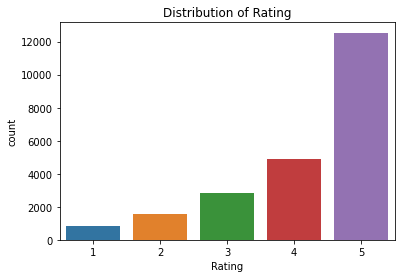

In [ ]:
sns.countplot(x='Rating',data=df_text)
plt.title("Distribution of Rating")   #plotting
#The figure shows that the most reviews are positive (rating 5) than negative

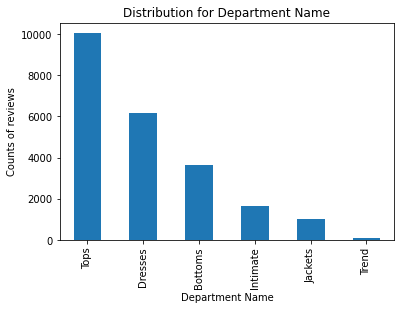

In [ ]:
df_text['Department Name'].value_counts().plot(kind='bar', title='Distribution for Department Name')
plt.xlabel("Department Name")
plt.ylabel("Counts of reviews")
plt.show()
#The figure shows that the most reviews products are tops and dresses.

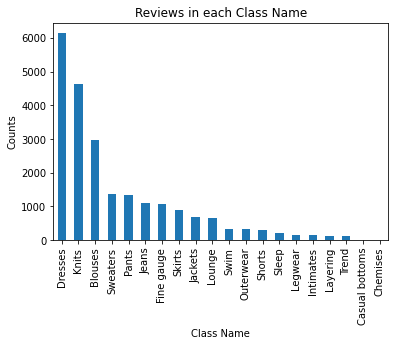

In [ ]:
df_text['Class Name'].value_counts().plot(kind='bar', title='Reviews in each Class Name')
plt.xlabel("Class Name")
plt.ylabel("Counts")
plt.show()
#customer age distribution

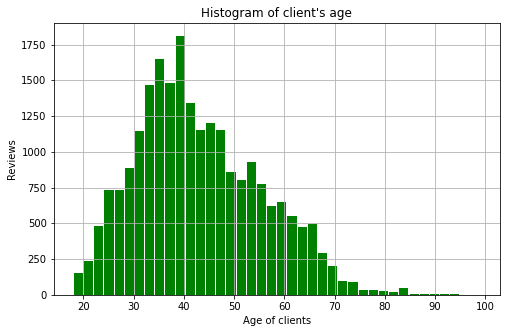

In [ ]:
#client age
df_text["Age"].hist(bins = 40, figsize=(8,5), rwidth=0.9, color="green")
plt.xlabel("Age of clients")
plt.ylabel("Reviews")
plt.title("Histogram of client's age");

In [ ]:
df_text['Review_length'] = df_text['Review'].apply(len)
df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate,53
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses,303
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses,500
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms,124
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192


Text(0.5, 1.0, 'Histogram of review length')

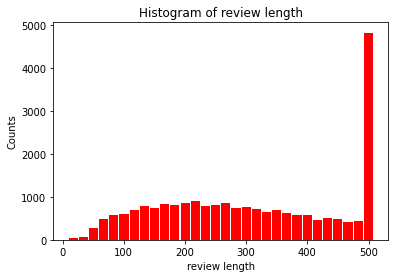

In [ ]:
df_text["Review_length"].plot(bins=30, rwidth=0.9, kind='hist', color="red")
plt.xlabel("review length")
plt.ylabel("Counts")
plt.title("Histogram of review length")

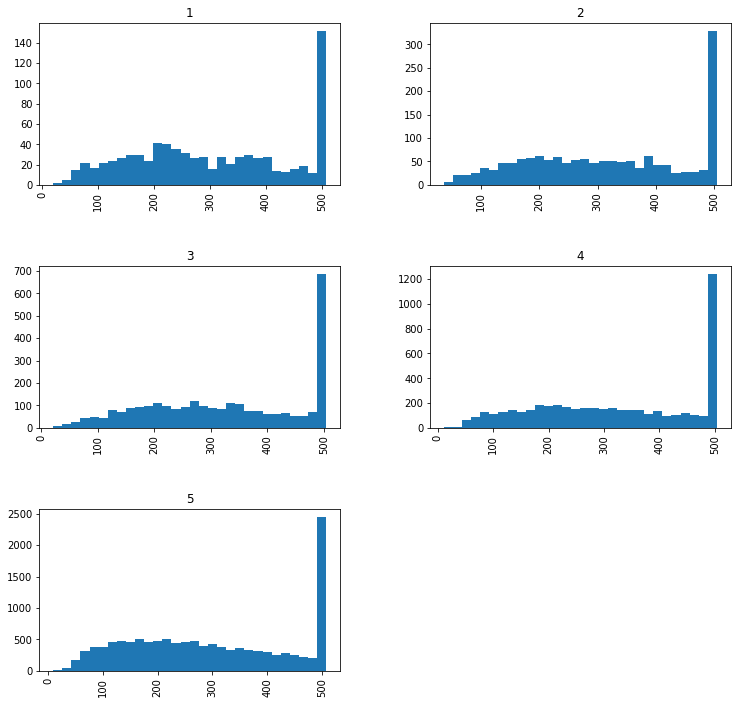

In [ ]:
df_text.hist(column='Review_length', by='Rating', bins=30,figsize=(12,12));
# most reviews length are more than 500 signs

In [ ]:
#df_text.groupby('Rating')[['Review_length']].mean().sort_values('Rating', ascending=False).plot(kind='bar',color=['violet'], title='The average reviews length of each rating');

In [ ]:
df_text.loc[df_text['Rating'] == 1].head()


,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
61,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,36,Intimates,Intimate,484
85,"I was really hoping to like this, but it did n...",1,0,2,58,Knits,Tops,499
96,I usually wear a medium and bought a small. it...,1,0,0,44,Blouses,Tops,238
97,I was very excited to order this top in red xs...,1,0,0,44,Knits,Tops,157
110,This is so thin and poor quality. especially f...,1,0,11,44,Knits,Tops,180


In [ ]:
df_text.loc[df_text['Rating'] == 5].head()


,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses,303
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms,124
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192
6,I aded this in my basket at hte last mintue to...,5,1,1,39,Knits,Tops,496
8,I love this dress. i usually get an xs but it ...,5,1,0,24,Dresses,Dresses,166


In [ ]:
df_text[df_text['Positive Feedback Count'] > 5].head()


,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192
10,Dress runs small esp where the zipper area run...,3,0,14,53,Dresses,Dresses,336
21,"I'm upset because for the price of the dress, ...",4,1,14,55,Dresses,Dresses,500
22,"First of all, this is not pullover styling. th...",2,0,7,31,Dresses,Dresses,437
31,I never would have given these pants a second ...,5,1,7,46,Pants,Bottoms,344


In [ ]:
df_text[(df_text['Rating'] > 4.0) & (df_text['Age'] < 30)].head(10)


,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
8,I love this dress. i usually get an xs but it ...,5,1,0,24,Dresses,Dresses,166
29,This sweater is so comfy and classic - it bala...,5,1,0,28,Sweaters,Tops,445
32,These pants are even better in person. the onl...,5,1,0,21,Pants,Bottoms,93
42,This poncho is so cute i love the plaid check ...,5,1,0,23,Fine gauge,Tops,239
62,I recently got this on sale after looking at i...,5,1,0,28,Knits,Tops,201
72,I have a short torso and this works well for m...,5,1,4,27,Blouses,Tops,500
91,This top is so much prettier in real life than...,5,1,5,29,Blouses,Tops,401
108,"The shirt is exactly as it is pictured, i have...",5,1,3,23,Blouses,Tops,316
122,This is a great pull over dress that can easil...,5,1,0,29,Dresses,Dresses,293
123,"After reading the previous reviews, i ordered ...",5,1,0,24,Blouses,Tops,189


In [ ]:
df_text['Class Name'].where(df['Rating'] > 4).count()


12527

In [ ]:
df_text['Class Name'].where(df['Rating'] < 3).count()


2370

In [ ]:
df_text.groupby('Class Name')['Rating'].agg(['max', 'min', 'mean', 'sum'])


,max,min,mean,sum
Class Name,,,,
Blouses,5,1,4.142809,12358
Casual bottoms,4,4,4.000000,4
Chemises,4,4,4.000000,4
Dresses,5,1,4.138812,25433
Fine gauge,5,1,4.237960,4488
Intimates,5,1,4.278912,629
Jackets,5,1,4.288433,2929
Jeans,5,1,4.347826,4800
Knits,5,1,4.145698,19178


In [ ]:
df_text.groupby('Rating')['Positive Feedback Count'].count().sort_values(ascending=False)


Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: Positive Feedback Count, dtype: int64

In [ ]:
df_text.groupby('Rating')['Positive Feedback Count'].agg(['max', 'min', 'mean', 'sum'])


,max,min,mean,sum
Rating,,,,
1,108,0,3.548112,2913
2,65,0,3.360232,5205
3,122,0,3.198725,9030
4,95,0,2.488386,12213
5,117,0,2.408134,30198


In [ ]:
df_text.groupby('Recommended')[['Review_length']].mean()


,Review_length
Recommended,
0,318.334065
1,306.554207


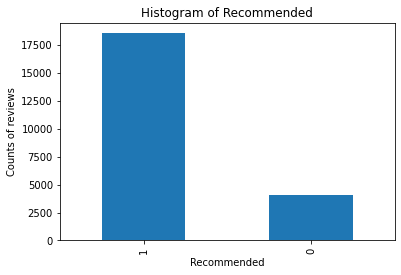

In [ ]:

df_text["Recommended"].value_counts().plot(kind='bar', title='Distribution for Recommended')
plt.xlabel("Recommended")
plt.ylabel("Counts of reviews")
plt.title("Histogram of Recommended");

In [ ]:
df_text['Positive Feedback Count'].mean()


2.630581688087982

In [ ]:
corr = df_text.corr()
corr

,Rating,Recommended,Positive Feedback Count,Age,Review_length
Rating,1.000000,0.792568,-0.060984,0.029962,-0.056199
Recommended,0.792568,1.000000,-0.065923,0.034208,-0.031519
Positive Feedback Count,-0.060984,-0.065923,1.000000,0.040850,0.191195
Age,0.029962,0.034208,0.040850,1.000000,0.014931
Review_length,-0.056199,-0.031519,0.191195,0.014931,1.000000


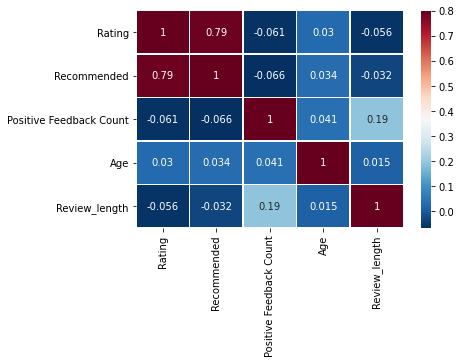

In [ ]:
ax = sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()


In [ ]:
docSentimentList=[]
def getDocumentSentimentList(docs,splitStr='__label__'):
    for i in range(len(docs)):
        #print('Processing doc ',i,' of ',len(docs))
        text=str(Rating[i])
        #print(text)
        splitText=text.split(splitStr)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        #print('First half:',secHalf[0],'\nsecond half:',secHalf[2:len(secHalf)-1])
        docSentimentList.append([text,sentiment])
    print('Done!!')
    return docSentimentList

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(df_text, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
 ).generate(str(df_text))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        plt.imshow(wordcloud)
        plt.show()

   

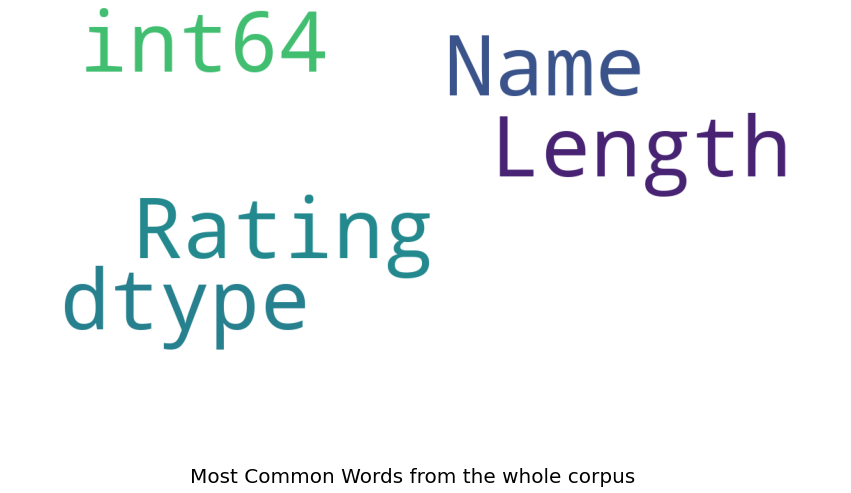

In [ ]:
show_wordcloud(df_text['Rating'],'Most Common Words from the whole corpus')

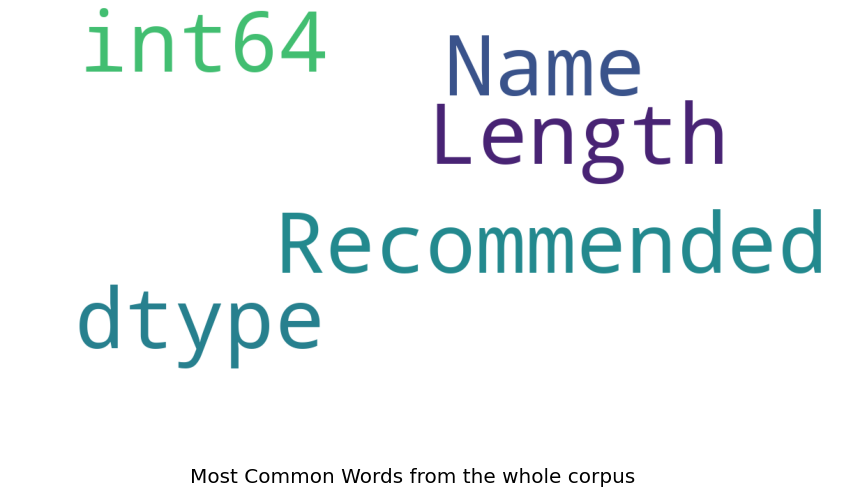

In [ ]:
show_wordcloud(df_text['Recommended'],'Most Common Words from the whole corpus')

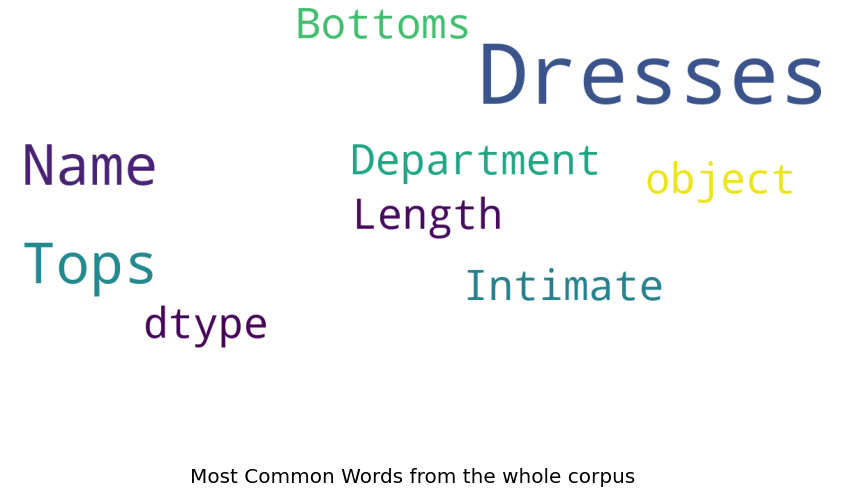

In [ ]:
show_wordcloud(df_text['Department Name'],'Most Common Words from the whole corpus')

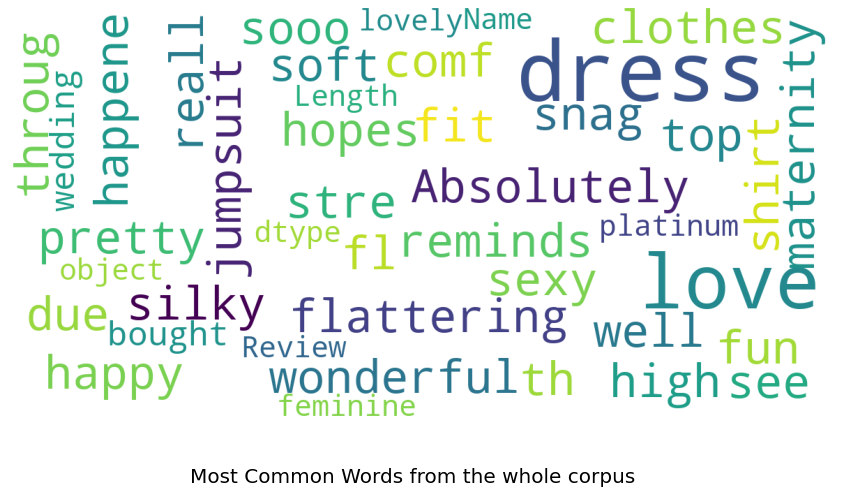

In [ ]:
show_wordcloud(df_text['Review'],'Most Common Words from the whole corpus')

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
st_wd = text.ENGLISH_STOP_WORDS
c_vector = CountVectorizer(stop_words = st_wd,min_df=.0001,lowercase=1)
c_vector.fit(df_text['Review'].values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=1, max_df=1.0, max_features=None, min_df=0.0001,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
word_list = list(c_vector.vocabulary_.keys())
stop_words = list(c_vector.stop_words)

In [ ]:
len(stop_words),len(word_list)

(318, 6206)

In [ ]:
def remove_words(raw_sen,stop_words):
    sen = [w for w in raw_sen if w not in stop_words]
    return sen

In [ ]:
def reviewEdit(raw_sen_list,stop_words):
    sen_list = []
    for i in range(len(raw_sen_list)):
        raw_sen = raw_sen_list[i].split()
        sen_list.append(remove_words(raw_sen,stop_words))
    return sen_list

In [ ]:
sen_list = reviewEdit(list(df_text['Review']),stop_words)
sen_list

[['Absolutely', 'wonderful', '-', 'silky', 'sexy', 'comfortable'],
 ['Love',
  'dress!',
  "it's",
  'sooo',
  'pretty.',
  'happened',
  'store,',
  "i'm",
  'glad',
  'did',
  'bc',
  'ordered',
  'online',
  'bc',
  "it's",
  'petite.',
  'bought',
  'petite',
  '5\'8".',
  'love',
  'length',
  'me-',
  'hits',
  'just',
  'little',
  'knee.',
  'definitely',
  'true',
  'midi',
  'truly',
  'petite.'],
 ['I',
  'high',
  'hopes',
  'dress',
  'really',
  'wanted',
  'work',
  'me.',
  'initially',
  'ordered',
  'petite',
  'small',
  '(my',
  'usual',
  'size)',
  'outrageously',
  'small.',
  'small',
  'fact',
  'zip',
  'up!',
  'reordered',
  'petite',
  'medium,',
  'just',
  'ok.',
  'overall,',
  'half',
  'comfortable',
  'fit',
  'nicely,',
  'half',
  'tight',
  'layer',
  'somewhat',
  'cheap',
  '(net)',
  'layers.',
  'imo,',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  '-',
  'c'],
 ['I',
  'love,',
  'love,',
  'love',


In [ ]:

df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate,53
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses,303
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses,500
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms,124
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192


In [ ]:
#! pip install gensim